## Prediction using supervised ML

In [65]:
##Importing libraries
import numpy as np
import pandas as pd

import seaborn as sns 
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [60]:
## Reading CSV file
data= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<AxesSubplot:>

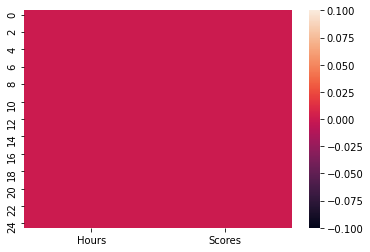

In [61]:
## Visualizing null values
sns.heatmap(data.isnull())

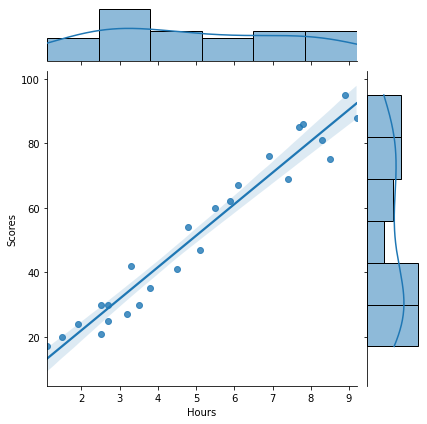

In [62]:
## Visualizing a regression line 
sns.jointplot(data['Hours'], data['Scores'],kind="reg")

In [63]:
## Splitting data into train and test
X_train, X_test, y_train, y_test =train_test_split(data[['Hours']], data[['Scores']])

In [64]:
## Making linear regression model
lr_model= LinearRegression(normalize=True)
lr_model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [21]:
##Accuracy on training data
lr_model.score(X_train,y_train)

0.9430322486751925

In [22]:
## Accuracy on test data
lr_model.score(X_test,y_test)

0.9629553504609104

In [29]:
## Making Randomforestregressor model by di=oing hyper parameter optimization
rfr_params= {
    'n_estimators':[100,150, 200, 250],
    'criterion':['mse','mae'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10]
}
gscrfc_model= GridSearchCV(RandomForestRegressor(), param_grid=rfr_params, cv=5)
gscrfc_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 150, 200, 250]})

In [48]:
rfr_model= RandomForestRegressor(n_estimators=300, max_depth=2)
rfr_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, n_estimators=300)

In [49]:
## Accuracy on training data
rfr_model.score(X_train,y_train)

0.970357525951733

In [50]:
## Accuracy on test data
rfr_model.score(X_test,y_test)

0.8831718168388464

In [53]:
## Making decision tree regressor model
dtr_model= DecisionTreeRegressor()
dtr_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [54]:
## Accuracy on training data
dtr_model.score(X_train,y_train)

0.9958641817717641

In [55]:
## Accuracy on test data
dtr_model.score(X_test,y_test)

0.8624541197316795

In [66]:
## Making AdaBoostRegressor model
abr_model= AdaBoostRegressor()
abr_model.fit(X_train,y_train)

AdaBoostRegressor()

In [67]:
## Accuracy on training data
abr_model.score(X_train,y_train)

0.9885098876893574

In [70]:
## Accuracy on test data
abr_model.score(X_test,y_test)

0.9391930241960564

## We have used 4 regression algorithms such as Linear Regression, Decison Tree Regressor, Random Forest Regressor, Ada Boost Regressor. Among all of them , Linear Regression is the only predictor which is not overfitting. 

In [72]:
# Q- What will be the predicted score if a student studies for 9.25 hour per day?
print("The predicted score if the student studies for 9.25 hours is",lr_model.predict([[9.25]]))

The predicted score if the student studies for 9.25 hours is [[91.60525088]]
